# Data analysis: Covid cases over time

Data analysis of daily new covid cases in different countries, using data from:

https://github.com/CSSEGISandData/COVID-19

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta

## Setup

In [2]:
plt.style.use("ggplot")

## Read data

In [3]:
df = pd.read_csv("time_series_covid19_confirmed_global.csv")

In [4]:
df.head(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,57242,57364,57492,57534,57612,57721,57793,57898,58037,58214
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,128518,128752,128959,129128,129307,129456,129594,129694,129842,129980
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,118645,118799,118975,119142,119323,119486,119642,119805,119992,120174


## Remove unused columns

In [5]:
df.drop(["Lat", "Long"], axis=1, inplace=True)

In [6]:
df.head(3)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,57242,57364,57492,57534,57612,57721,57793,57898,58037,58214
1,NaN,Albania,0,0,0,0,0,0,0,0,...,128518,128752,128959,129128,129307,129456,129594,129694,129842,129980
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,118645,118799,118975,119142,119323,119486,119642,119805,119992,120174


## Convert from wide format to long

In [7]:
df = df.melt(id_vars=["Province/State", "Country/Region"], var_name="Date", value_name="Cases")

In [8]:
df.head(3)

,Province/State,Country/Region,Date,Cases
0,NaN,Afghanistan,1/22/20,0
1,NaN,Albania,1/22/20,0
2,NaN,Algeria,1/22/20,0


## Make values in date column proper dates

In [9]:
df.dtypes

Province/State    object
Country/Region    object
Date              object
Cases              int64
dtype: object

In [10]:
df["Date"] = pd.to_datetime(df["Date"])

In [11]:
df.dtypes

Province/State            object
Country/Region            object
Date              datetime64[ns]
Cases                      int64
dtype: object

In [12]:
df.head(3)

,Province/State,Country/Region,Date,Cases
0,NaN,Afghanistan,2020-01-22,0
1,NaN,Albania,2020-01-22,0
2,NaN,Algeria,2020-01-22,0


## Sum provinces, aggregate to country level

In [13]:
df[(df["Country/Region"] == "United Kingdom") & 
   (df["Date"] == datetime(2021, 1, 1))]

,Province/State,Country/Region,Date,Cases
94783,Anguilla,United Kingdom,2021-01-01,13
94784,Bermuda,United Kingdom,2021-01-01,604
94785,British Virgin Islands,United Kingdom,2021-01-01,86
94786,Cayman Islands,United Kingdom,2021-01-01,338
94787,Channel Islands,United Kingdom,2021-01-01,3059
94788,Falkland Islands (Malvinas),United Kingdom,2021-01-01,29
94789,Gibraltar,United Kingdom,2021-01-01,2212
94790,Isle of Man,United Kingdom,2021-01-01,377
94791,Montserrat,United Kingdom,2021-01-01,13
94792,"Saint Helena, Ascension and Tristan da Cunha",United Kingdom,2021-01-01,4


In [14]:
df = df.groupby(["Country/Region", "Date"], as_index=False).sum()

In [15]:
df[(df["Country/Region"] == "United Kingdom") &
   (df["Date"] == datetime(2021, 1, 1))]

,Country/Region,Date,Cases
83337,United Kingdom,2021-01-01,2549693


## Convert cumulative total to daily new cases

In [16]:
df[(df["Country/Region"] == "Poland") & 
   (df["Date"] >= datetime(2021, 1, 1)) & 
   (df["Date"] <= datetime(2021, 1, 5))]

,Country/Region,Date,Cases
63273,Poland,2021-01-01,1305774
63274,Poland,2021-01-02,1312780
63275,Poland,2021-01-03,1318562
63276,Poland,2021-01-04,1322947
63277,Poland,2021-01-05,1330543


In [17]:
df[["Cases"]] = df[["Country/Region", "Cases"]].groupby("Country/Region").diff()

In [18]:
df[(df["Country/Region"] == "Poland") & 
   (df["Date"] >= datetime(2021, 1, 1)) & 
   (df["Date"] <= datetime(2021, 1, 5))]

,Country/Region,Date,Cases
63273,Poland,2021-01-01,10896.0
63274,Poland,2021-01-02,7006.0
63275,Poland,2021-01-03,5782.0
63276,Poland,2021-01-04,4385.0
63277,Poland,2021-01-05,7596.0


## Analyze the data

In [19]:
def to_start_of_week(date):
    return date - timedelta(days=date.weekday())

In [20]:
date_from = to_start_of_week(datetime(2021, 1, 1))
date_to = to_start_of_week(datetime(2021, 4, 22))
countries = ["Poland", "Czechia", "Germany", "Austria"]

In [21]:
df = df.loc[df["Country/Region"].isin(countries) & 
            (df["Date"] >= date_from) &
            (df["Date"] <= date_to)]

In [22]:
df.head(3)

,Country/Region,Date,Cases
4445,Austria,2020-12-28,1592.0
4446,Austria,2020-12-29,1868.0
4447,Austria,2020-12-30,2550.0


### Day by day plot

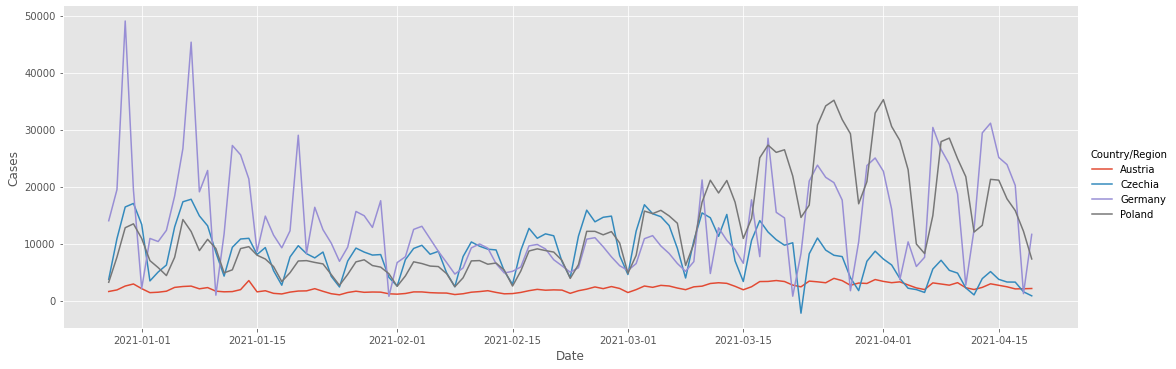

In [23]:
sns.relplot(data=df, x="Date", y="Cases", hue="Country/Region", kind="line", aspect=3)

### Week by week plot

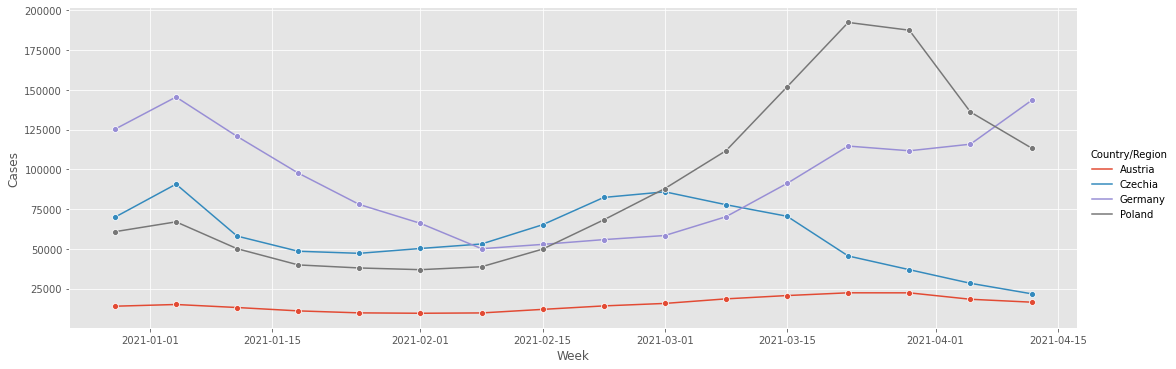

In [26]:
def week_by_week_plot(df):
    plot_df = df.copy()
    plot_df["Week"] = plot_df["Date"].apply(to_start_of_week)
    plot_df = plot_df[(plot_df["Date"] >= to_start_of_week(date_from)) &
                      (plot_df["Date"] < to_start_of_week(date_to))]
    plot_df = plot_df.groupby(["Country/Region", "Week"]).sum().reset_index()
    sns.relplot(data=plot_df, x="Week", y="Cases", hue="Country/Region", kind="line", marker="o", aspect=3)

week_by_week_plot(df)